In [1]:
#import required libs 
import numpy as np
import os
import matplotlib.pyplot as plt

from skimage.io import imread
from sklearn.metrics import classification_report, confusion_matrix
from sklearn .model_selection import train_test_split

import glob
import keras
import keras.backend as K
from keras.preprocessing.image import load_img, img_to_array, ImageDataGenerator
from keras.utils.np_utils import to_categorical
from keras import layers
from keras.models import Sequential, Model
from keras.callbacks import EarlyStopping, ModelCheckpoint

Using TensorFlow backend.


# Preparation 

## Importing Data

The dataset contains three main folders : color (Original RGB images), grayscale (grayscaled version of the raw images), segmented (RGB images with just the leaf segmented and color corrected). 

Each folder is splited to many folders, where each one corresponds to set of images (healthy or disease) for each plant (Potato , Apple corn, grape, tomato etc. ) in this tutorial only grape and tomato will be studied

In [2]:
# Defining the main path for both Grape and Tomato 
Path_grape = './Dataset/Diseases/Grape'
Path_tomato='./Dataset/Diseases/Tomato'

In [3]:
%pwd

'C:\\Users\\bmakh\\Projects'

## 1- Grape dataset 
### 1.1-  cleaning and reading dataset 
#### Cleaning the data and reorganizing them 

In [4]:
# # this cell to be run if you have the row data and must be run only one time 
folders= ['Black_rot','Esca_(Black_Measles)', 'healthy', 'Leaf_blight']
# for folder in folders:
#     path=Path_grape+'/color/'+folder
#     path1=Path_grape+'/grayscale/'+folder 
     
#     for i, img in enumerate(os.listdir(path)): 
#         name=str(i)+'_'+folder+'.JPG'
#         os.rename(path+'/'+img, path+'/'+name)
#         os.rename(path1+'/'+img, path1+'/'+name)
       
        
      

In [5]:

# # # segmented image must be renamed separetly         
# for folder in folders:
#     path2=Path_grape+'/segmented/'+folder
#     for i, img in enumerate(os.listdir(path2)):
#         name=str(i)+'_'+folder+'.JPG'
#         os.rename(path2+'/'+img, path2+'/'+name)

#### Reading the dataset : 

In [6]:
#Read Gray dataset
Gray_images = []
for im in glob.glob(Path_grape+"/grayscale/*/*.JPG"):
    Gray_images.append(im.split('\\')[2])

#Read Segmented dataset
Seg_images = []
for im in glob.glob(Path_grape+"/segmented/*/*.JPG"):
    Seg_images.append(im.split('\\')[2])

 #### Plotting some examples of my dataset 

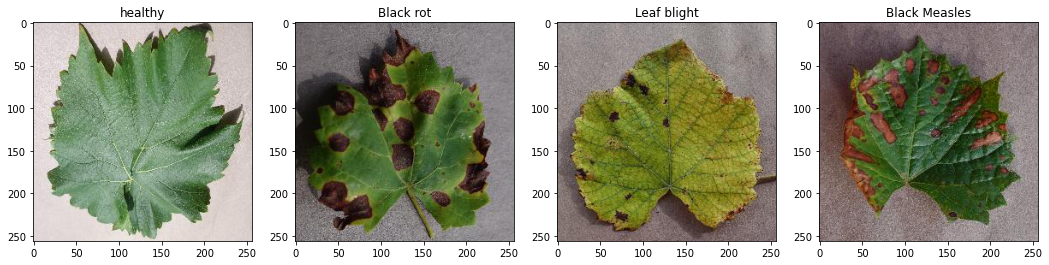

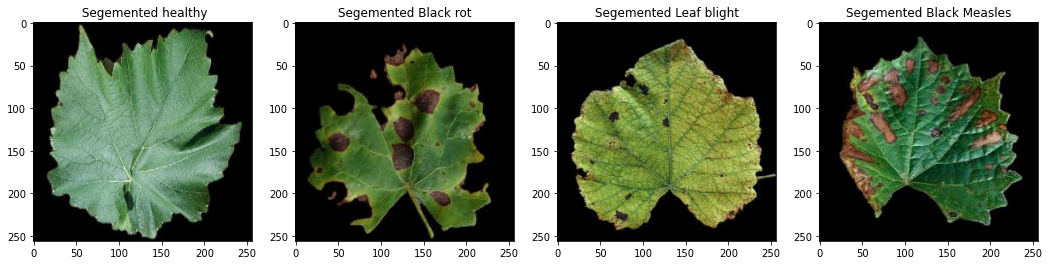

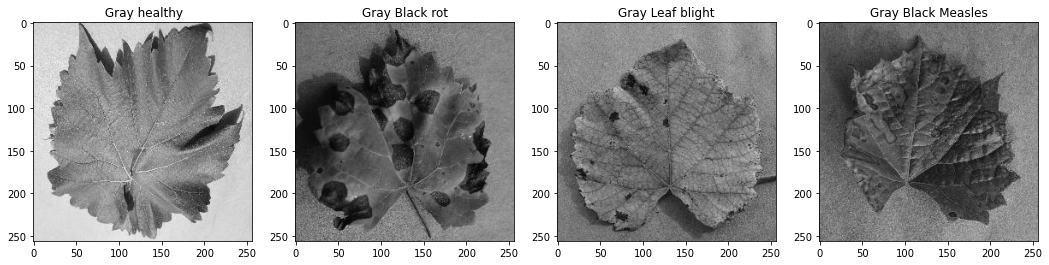

In [7]:


plt.figure(figsize=(18,13))
plt.subplot(1,4,1)
plt.title("healthy")
plt.imshow(imread(Path_grape+'/color/healthy/2_healthy.JPG'))
plt.subplot(1,4,2)
plt.title("Black rot")
plt.imshow(imread(Path_grape+'/color/Black_rot/27_Black_rot.JPG'))
plt.subplot(1,4,3)
plt.title("Leaf blight")
plt.imshow(imread(Path_grape+'/color/Leaf_blight/16_Leaf_blight.JPG'))
plt.subplot(1,4,4)
plt.title("Black Measles")
plt.imshow(imread(Path_grape+'/color/Esca_(Black_Measles)/42_Esca_(Black_Measles).JPG'))
plt.show()


plt.figure(figsize=(18,13))
plt.subplot(1,4,1)
plt.title(" Segemented healthy")
plt.imshow(imread(Path_grape+'/segmented/healthy/2_healthy.JPG'))
plt.subplot(1,4,2)
plt.title("Segemented Black rot")
plt.imshow(imread(Path_grape+'/segmented/Black_rot/27_Black_rot.JPG'))
plt.subplot(1,4,3)
plt.title("Segemented Leaf blight")
plt.imshow(imread(Path_grape+'/segmented/Leaf_blight/16_Leaf_blight.JPG'))
plt.subplot(1,4,4)
plt.title("Segemented Black Measles")
plt.imshow(imread(Path_grape+'/segmented/Esca_(Black_Measles)/42_Esca_(Black_Measles).JPG'))
plt.show()


plt.figure(figsize=(18,13))
plt.subplot(1,4,1)
plt.title(" Gray healthy")
plt.imshow(imread(Path_grape+'/grayscale/healthy/2_healthy.JPG'))
plt.subplot(1,4,2)
plt.title("Gray Black rot")
plt.imshow(imread(Path_grape+'/grayscale/Black_rot/27_Black_rot.JPG'))
plt.subplot(1,4,3)
plt.title("Gray Leaf blight")
plt.imshow(imread(Path_grape+'/grayscale/Leaf_blight/16_Leaf_blight.JPG'))
plt.subplot(1,4,4)
plt.title("Gray Black Measles")
plt.imshow(imread(Path_grape+'/grayscale/Esca_(Black_Measles)/42_Esca_(Black_Measles).JPG'))
plt.show()

In [8]:
# # Here is how classes are going to be mapped : 
# Healthy==> 0
# Black rot ==> 1
# Black Measles==> 2
# leaf blight ==> 3 
# ['0', '1', '2', '3']==> ['healthy','Black','Esca','Leaf' ]
Labels=['0', '1', '2', '3']
#load everything into memory


In [9]:
General_path=Path_grape

x=[] #==> dataset 
y=[] #==> label 
#Read colored dataset
Input_images = []
for fold in folders: 
        for  i, im in enumerate(glob.glob(Path_grape+"/color/"+fold+'/*.JPG')):
            
            if fold=='healthy': 
                class_lab=0

            if fold=='Black_rot': 
                class_lab=1

            if fold=='Esca_(Black_Measles)': 
                class_lab=2


            if fold=='Leaf_blight': 
                class_lab=3

            #Input_images.append(im.split('\\')[2])  

            image = load_img(im,target_size=(64,64))
            image = img_to_array(image)/255.
            x.append(image)
            y.append(class_lab)

In [19]:
# converting the dim of my labels array from (1,) to (6,)
x=np.array(x)
#print(x)
y=to_categorical(y)
#y

In [11]:
x_train, _x, y_train, _y = train_test_split(x,y,test_size=0.2, stratify = y, random_state = 1)
x_valid,x_test, y_valid, y_test = train_test_split(_x,_y,test_size=0.4, stratify = _y, random_state = 1)

# x_train=np.array(x_train)
# x_test=np.array(x_test)
# y_train=np.array(y_train)
# y_test=np.array(y_test)
# x_valid=np.array(x_valid)
# y_valid=np.array(y_valid)

print("train data:",x_train.shape,y_train.shape)
print("validation data:",x_valid.shape,y_valid.shape)
print("test data:",x_test.shape,y_test.shape)

train data: (3249, 64, 64, 3) (3249, 4)
validation data: (487, 64, 64, 3) (487, 4)
test data: (326, 64, 64, 3) (326, 4)


In [12]:
len(x_train[0])

64

In [17]:
len(image)

64

## 1.2- Model preparation 

In [ ]:
K.clear_session()

nfilter = 32

#VGG16 like model
model = Sequential([
    #block1
    layers.Conv2D(nfilter,(3,3),padding="same",name="block1_conv1",input_shape=(64,64,3)),
    layers.Activation("relu"),
    layers.BatchNormalization(),#improving the speed, performance, and stability of my CNN ,
    #normalize the input layer by re-centering and re-scaling
    layers.Dropout(rate=0.2),   
    
    layers.Conv2D(nfilter,(3,3),padding="same",name="block1_conv2"),
    layers.BatchNormalization(),
    layers.Activation("relu"),
    layers.Dropout(rate=0.2),
    layers.MaxPooling2D((2,2),strides=(2,2),name="block1_pool"),
    
    #block2
    layers.Conv2D(nfilter*2,(3,3),padding="same",name="block2_conv1"),
    layers.BatchNormalization(),
    layers.Activation("relu"),
    layers.Dropout(rate=0.2),
    
    layers.Conv2D(nfilter*2,(3,3),padding="same",name="block2_conv2"),
    layers.BatchNormalization(),
    layers.Activation("relu"),
    layers.Dropout(rate=0.2),
    layers.MaxPooling2D((2,2),strides=(2,2),name="block2_pool"),
    
    #block3
    layers.Conv2D(nfilter*2,(3,3),padding="same",name="block3_conv1"),
    layers.BatchNormalization(),
    layers.Activation("relu"),
    layers.Dropout(rate=0.2),
    
    layers.Conv2D(nfilter*4,(3,3),padding="same",name="block3_conv2"),
    layers.BatchNormalization(),
    layers.Activation("relu"),
    layers.Dropout(rate=0.2),
    
    layers.Conv2D(nfilter*4,(3,3),padding="same",name="block3_conv3"),
    layers.BatchNormalization(),
    layers.Activation("relu"),
    layers.Dropout(rate=0.2),
    layers.MaxPooling2D((2,2),strides=(2,2),name="block3_pool"),
    #layers.Flatten(),
    layers.GlobalAveragePooling2D(),
    
    #inference layer
    layers.Dense(128,name="fc1"),
    layers.BatchNormalization(),
    layers.Activation("relu"),
    layers.Dropout(rate=0.2),
    
    layers.Dense(128,name="fc2"),
    layers.BatchNormalization(),
    layers.Activation("relu"),    
    layers.Dropout(rate=0.2),
    
    layers.Dense(4,name="prepredictions"), # the number of labels in my model 
    layers.Activation("softmax",name="predictions")])

model.compile(optimizer = "adam", loss="categorical_crossentropy", metrics=["accuracy"])

model.summary()

## 1.3- Model training 

In [ ]:
# trdata = ImageDataGenerator()
# traindata = trdata.flow_from_directory(directory="data",target_size=(224,224))
# tsdata = ImageDataGenerator()
# testdata = tsdata.flow_from_directory(directory="test", target_size=(224,224))


#we will define a generator class for training data and validation data seperately, 
# as no augmentation is not required for validation data

trdata = ImageDataGenerator(rotation_range=90,horizontal_flip=True)
vldata = ImageDataGenerator()
train_data = trdata.flow(x_train,y_train,batch_size=98)
valid_data = vldata.flow(x_valid,y_valid,batch_size=98)

In [ ]:
#utilize early stopping function to stop at the lowest validation loss
es = EarlyStopping(monitor='val_loss', patience=7, verbose=1, mode='auto')# loss over validation set is the monitored metric 
# patience over 10 epochs before stop the training when no improvement is existing 
# mode auto, the direction is automatically inferred from the name of the monitored quantity.
ckpt = ModelCheckpoint("GrapeDisease.hdf5", monitor='val_loss', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)

In [ ]:
history = model.fit_generator(train_data,steps_per_epoch = train_data.n // 98, callbacks = [es,ckpt], 
    validation_data = valid_data, validation_steps = valid_data.n // 98,epochs=50)

# the // sign keeps only the integer part 
#es is early stopping 
# ckpt is the model check point  

## 1.4- Prediction

In [ ]:

#true label
y_true = np.argmax(y_test,axis=1)

#prediction label
Y_pred = model.predict(x_test)
y_pred = np.argmax(Y_pred, axis=1)

print(y_true)
print(y_pred)


## 1.5- Model evaluation 

In [ ]:
#load the best saved model with lowest validation loss from the predefined file 
model.load_weights("GrapeDisease.hdf5")
#check the model metrics
print(model.metrics_names)
#evaluate training data
print(model.evaluate(x= x_train, y = y_train))
#evaluate  validation data
print(model.evaluate(x= x_valid, y = y_valid))
#evaluate  test data
print(model.evaluate(x= x_test, y = y_test))      

In [ ]:
from sklearn.metrics import confusion_matrix
# Compute confusion matrix
def Calculate_confMatrix (y_true, y_pred, normalize=False): 
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    #classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    return cm 

    
conf_mat = Calculate_confMatrix(y_true, y_pred, normalize=True)


In [ ]:
classes=['healthy','Black Rot','Esca','Leaf blight' ]
conf_mat_normalized=conf_mat
fig, ax = plt.subplots(figsize=(5,5))
im = ax.imshow(conf_mat_normalized, interpolation='nearest', cmap=plt.cm.Blues)
#ax.figure.colorbar(im, ax=ax)
# We want to show all ticks...
ax.set(xticks=np.arange(conf_mat_normalized.shape[1]),
       yticks=np.arange(conf_mat_normalized.shape[0]),
       # ... and label them with the respective list entries
       xticklabels=classes, yticklabels=classes,
       title='Normalized confusion matrix',
       ylabel='True label',
       xlabel='Predicted label')

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
fmt = '.2f'
thresh = conf_mat_normalized.max() / 2.
for i in range(conf_mat_normalized.shape[0]):
    for j in range(conf_mat_normalized.shape[1]):
        ax.text(j, i, format(conf_mat_normalized[i, j], fmt),
                ha="center", va="center",
                color="white" if conf_mat_normalized[i, j] > thresh else "black")
fig.tight_layout()
np.set_printoptions(precision=2)


### 1.6- Predicting unseen Data 

In [ ]:
n = 150 #do not exceed (number of test image - 1)

plt.imshow(x_test[n])
plt.show()

true_label = np.argmax(y_test,axis=1)[n]
print("true_label is:",true_label,":",classes[true_label])
prediction = model.predict(x_test[n][np.newaxis,...])[0]
print("predicted_value is:",prediction)
predicted_label = np.argmax(prediction)
print("predicted_label is:",predicted_label,":",classes[predicted_label])

if true_label == predicted_label:
    print("correct prediction")
else:
    print("wrong prediction")